# Normalização e seleção de features

Nesta seção, iremos entender as principais características dos *data sets* [Iris Dataset](https://archive.ics.uci.edu/ml/datasets/iris) e [Wine Dataset](http://archive.ics.uci.edu/ml/datasets/Wine), visando selecionar features para a clusterização e a normalização dos atributos.

In [115]:
from sklearn.decomposition import PCA
from sklearn import preprocessing
# from sklearn.min_max_scaler import fit_transform

import pandas            as pd
import seaborn           as sns
import matplotlib.pyplot as plt


# Argumentos e pré-definições do seaborn
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
sns.set(style="ticks")

filepath_iris = '../data/iris.csv'
filepath_wine = '../data/wine.csv'

## Carregando os dados e entendendo o que eles significam

A primeira parte deste teste é importar as bases de dados e entender o que elas já dizem logo de cara.

### Entendendo o *dataset* Iris
Este dataset apresenta 3 espécies de uma planta florífera do gênero iris, a setosa, versicolor e virginica. Para cada uma das classes existem 50 exemplares e 4 características, ou *features*, que são os comprimentos e larguras tanto da pétala quanto da sépala das flores.

Os dados são importados para um *DataFrame* do *pandas* e descrevemos suas principais características para iniciar a análise. Primeiramente conferimos que a contagem para cada uma das *features* é 150 e também a média para todos os valores, além de outras informações. Este tipo de retorno é interessante para começar a entender como cada característica influencia na identificação da espécie. Mas, levando em conta que nosso objetivo é espécie das flores, seria mais interessante agrupar estes dados, então, justamente pela especie. E é o que faremos em seguida.

In [63]:
iris_df = pd.read_csv(filepath_iris)
iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
iris_df.groupby('species').agg(['mean', 'median'])

sepal_length        sepal_width        petal_length         \
                        mean median        mean median         mean median   
species                                                                      
Iris-setosa            5.006    5.0       3.418    3.4        1.464   1.50   
Iris-versicolor        5.936    5.9       2.770    2.8        4.260   4.35   
Iris-virginica         6.588    6.5       2.974    3.0        5.552   5.55   

                petal_width         
                       mean median  
species                             
Iris-setosa           0.244    0.2  
Iris-versicolor       1.326    1.3  
Iris-virginica        2.026    2.0

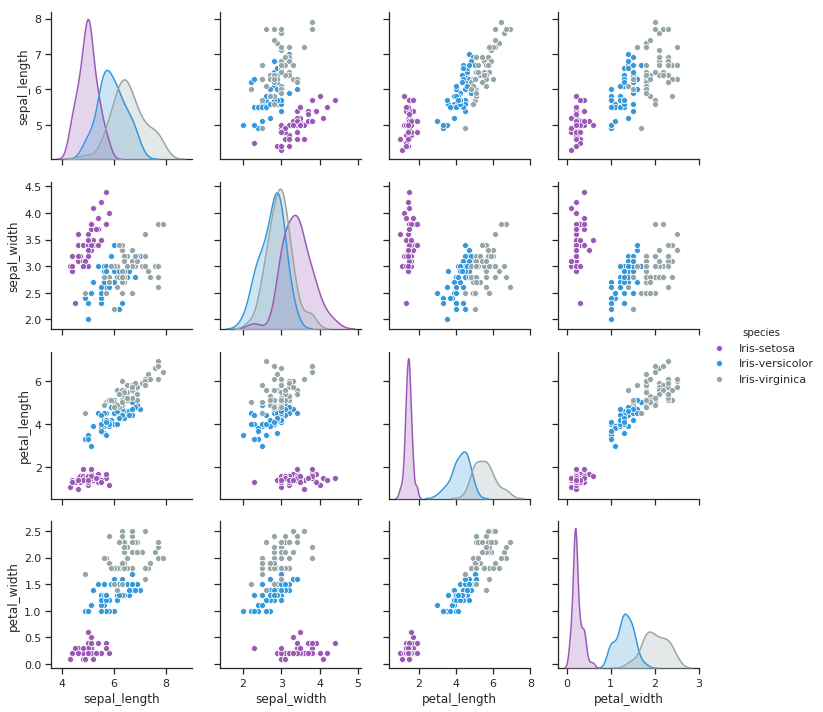

In [7]:
sns.pairplot(iris_df, hue="species", palette=sns.color_palette(flatui))

In [148]:
X = np.array(iris_df[iris_df.columns[:-1]])
Y = np.array(iris_df.species)

X = preprocessing.MaxAbsScaler().fit_transform(X)

# X = preprocessing.QuantileTransformer(random_state=0).fit_transform(X)

# X = preprocessing.normalize(X, norm='l2')

In [149]:
# reference = {key:qtd for qtd,key in enumerate(set(iris_df.species))}
# for i,specie in enumerate(iris_df.species):
#     Y[i] = reference[specie]

pca = PCA(n_components=2)
pca.fit(X)

split_2d = pca.transform(X)
pca1,pca2 = zip(*split_2d)

iris_2d = pd.DataFrame( {'PCA1':pca1, 'PCA2':pca2, 'species':Y} )
iris_2d.head()

,PCA1,PCA2,species
0,-0.540724,0.055719,Iris-setosa
1,-0.535488,-0.058969,Iris-setosa
2,-0.554452,-0.023399,Iris-setosa
3,-0.537041,-0.051309,Iris-setosa
4,-0.545695,0.072879,Iris-setosa


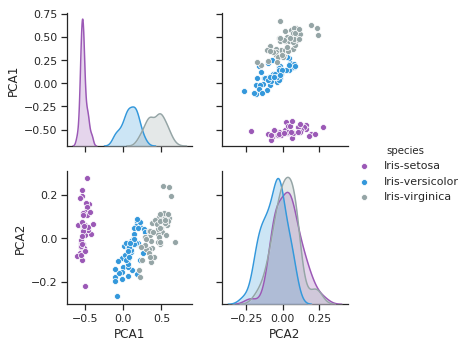

In [150]:
sns.pairplot(iris_2d,
             x_vars=["PCA1", "PCA2"],
             y_vars=["PCA1", "PCA2"],
             hue="species", palette=sns.color_palette(flatui))

In [152]:
iris_2d.to_csv('../data/Iris-norm.csv')